Predicting weekly sales of a walmart store using linear regression

Within the data file are the following fields:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week: 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

In [ ]:
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Download the CSV file.
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 73.5MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_df = pd.read_csv('Walmart.csv')

In [ ]:
data_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Imports for regression model and analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import datetime as dt

Modifying the data set

In [ ]:
holiday_name = {
    1: ["12-02-2010", "11-02-2011", "10-02-2012", "08-02-2013"],
    2: ["10-09-2010", "09-09-2011", "07-09-2012", "06-09-2013"],
    3: ["26-11-2010", "25-11-2011", "23-11-2012", "29-11-2013"],
    4: ["31-12-2010", "30-12-2011", "28-12-2012", "27-12-2013"]
}

# here the different holidays have been assigned numbers as to plot easily at the end
# 1 - Super Bowl
# 2 - Labour Day
# 3 - Thanksgiving
# 4 - Christmas

holidays = []

for index, row in data_df.iterrows():
    if row["Holiday_Flag"] == 1:
        for label in holiday_name:
            if row["Date"] in holiday_name[label]:
                holidays.append(label)
                break
    else:
        holidays.append(0)

# if the flag = 1 and the date matches with something in the holiday-name dictionary then append the label from the dictionary which applies, or if not then puts in none

data_df.insert(8, "holiday type", holidays)

print(holidays)
len(holidays)  # checking that the correct length of list was formed

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 

6435

Normalisation of the data

In [ ]:
#normalising the data

numerical_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']  # deciding which variables will be normalised

scaler = MinMaxScaler()

data_df[numerical_features] = scaler.fit_transform(data_df[numerical_features])  # the 2 lines above simply call the function that will normalise

data_df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,holiday type
0,1,05-02-2010,0.397291,0,0.434149,0.050100,0.840500,0.405118,0
1,1,12-02-2010,0.396811,1,0.396967,0.038076,0.841941,0.405118,1
2,1,19-02-2010,0.388501,0,0.410861,0.021042,0.842405,0.405118,0
3,1,26-02-2010,0.332458,0,0.476419,0.044589,0.842707,0.405118,0
4,1,05-03-2010,0.372661,0,0.475147,0.076653,0.843008,0.405118,0


Defining the data sets to be used

In [ ]:
data_x = data_df.drop(['Date','Weekly_Sales'], axis=1)  # defining the data_x table such that it doesnot include weekly sales values
data_y = data_df['Weekly_Sales']  # defining data_y

Applying polynomial features to data_x

In [ ]:
#Polynomial formed
polynomial = PolynomialFeatures(4) # creating a 4th degree polynomail
poly = polynomial.fit(data_x)

data_polynomial = poly.fit_transform(data_x) # fitting the above polynomial to data_x

data_poly_x= pd.DataFrame(data_polynomial)  # creating a new data frame with this polynomial fit data

data_poly_x.head()

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,1.0,1.0,0.0,0.434149,0.050100,0.840500,0.405118,0.0,1.0,0.0,...,0.000000,0.055883,0.00000,0.000000,0.000000,0.026936,0.000000,0.00000,0.000000,0.0
1,1.0,1.0,1.0,0.396967,0.038076,0.841941,0.405118,1.0,1.0,1.0,...,0.708865,0.055979,0.13818,0.341085,0.841941,0.026936,0.066488,0.16412,0.405118,1.0
2,1.0,1.0,0.0,0.410861,0.021042,0.842405,0.405118,0.0,1.0,0.0,...,0.000000,0.056010,0.00000,0.000000,0.000000,0.026936,0.000000,0.00000,0.000000,0.0
3,1.0,1.0,0.0,0.476419,0.044589,0.842707,0.405118,0.0,1.0,0.0,...,0.000000,0.056030,0.00000,0.000000,0.000000,0.026936,0.000000,0.00000,0.000000,0.0
4,1.0,1.0,0.0,0.475147,0.076653,0.843008,0.405118,0.0,1.0,0.0,...,0.000000,0.056050,0.00000,0.000000,0.000000,0.026936,0.000000,0.00000,0.000000,0.0


Forming and analysing the regression models

In [ ]:
#applying the regression models

train_x, test_x = train_test_split(data_poly_x, test_size = 0.2, random_state=50) # making the training sets
train_y, test_y = train_test_split(data_y, test_size = 0.2, random_state=50)

regr = linear_model.LinearRegression() # making the regression model

regr.fit(train_x, train_y)  # The model is being trained using the training data

data_y_pred = regr.predict(test_x) # a set of values is now predicted

# Finding required analysis values

print("Coefficients: \n", regr.coef_) # the coefficients of the regression model are now calculated

print("Mean squared error: %.2f" % mean_squared_error(test_y, data_y_pred)) # Now finding the mean square error between the test and predicted data from model

RMSE = np.sqrt(mean_squared_error(test_y, data_y_pred))
print("Root mean squared error: %.2f" % RMSE)

AME = np.mean(abs(test_y - data_y_pred))
print("Mean absolute error: %.2f" % AME)

print("Coefficient of determination: %.2f" % r2_score(test_y, data_y_pred))

print(test_x.shape)
print(data_y_pred.shape)

Coefficients: 
 [ 3.34899003e-07 -3.30093002e-02  1.05940184e+00 -3.38986451e-01
  2.36845924e+00 -1.53097016e+01 -5.87732920e+00 -5.82241540e-01
 -3.29236007e-04 -4.24596779e-02 -5.36416603e-02 -1.84908207e-02
  1.33491163e+00  1.22287801e-01  5.84897337e-02  1.05940187e+00
 -4.77847034e+00 -1.31539728e+00  3.65633593e-01 -7.20983762e-01
 -5.82241514e-01 -3.44456611e+00  2.18769970e+00 -4.11211954e+00
  1.16879604e+01  7.72933050e+00 -7.78728102e+00  2.64468215e+00
 -1.25858545e+00  1.89488757e-01  3.74610167e+00  1.82378358e+01
 -1.46578002e-01  6.69865288e+00  8.96469916e-01 -1.23615425e+00
 -6.62941258e-05  6.02206381e-04  2.85530774e-03 -1.50658398e-03
 -1.22350178e-02  4.17236522e-03 -4.81940868e-04 -4.24596688e-02
  6.20063560e-02 -3.75044927e-02 -6.98968562e-03  1.53736485e-03
  5.84897364e-02  1.32614096e-01 -9.85192033e-02 -1.55750727e-01
 -2.64594816e-01 -7.12472357e-02  2.70568666e-02  2.33718352e-01
  1.40062935e-01  4.75091597e-02 -1.88511483e+00 -1.08155050e+00
 -3.74523

Final plots

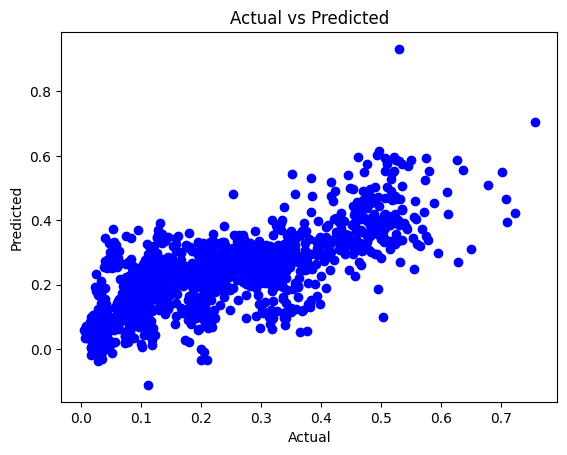

In [ ]:
# Plotting the final results

plt.scatter(test_y, data_y_pred, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()